# gpx parser

In [1]:
import gpxpy
import gpxpy.gpx
import numpy as np
import folium

In [ ]:
help(folium)

In [2]:
# Parsing an existing file:
# -------------------------

gpx_file = open('test.gpx', 'r')

gpx = gpxpy.parse(gpx_file, version="1.0")


In [3]:
for track in gpx.tracks:
    for segment in track.segments:
        for idx,point in enumerate(segment.points):
            #print(point.time)
            #print(idx)
            if idx < 10:
                print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation));


Point at (47.4504,12.3352) -> 811.0999755859375
Point at (47.4501,12.3354) -> 808.5999755859375
Point at (47.4499,12.3355) -> 809.2000122070312
Point at (47.4497,12.3356) -> 812.5999755859375
Point at (47.4495,12.3358) -> 816.4000244140625
Point at (47.4493,12.3359) -> 819.4000244140625
Point at (47.4492,12.336) -> 820.7000122070312
Point at (47.449,12.3362) -> 820.9000244140625
Point at (47.4489,12.3363) -> 822.0
Point at (47.4487,12.3364) -> 824.7999877929688


In [4]:
p0 = gpx.tracks[0].segments[0].points[0]
p1 = gpx.tracks[0].segments[0].points[1]
print(p0)
print(p1)

[trkpt:47.4504,12.3352@811.0999755859375@2023-01-01 07:34:19+00:00]
[trkpt:47.4501,12.3354@808.5999755859375@2023-01-01 07:34:57+00:00]


In [65]:
moving_data = gpx.get_moving_data(raw=True)
print(moving_data)
minmax = gpx.get_elevation_extremes()
print("tiefster Punkt: ",minmax[0])
print("höchster Punkt: ",minmax[1])
#min_elev = minmax.minimum
coordinates = gpx.get_bounds()
print(coordinates)
print(coordinates.min_latitude)
print(coordinates.max_latitude)
print(coordinates.min_longitude)
print(coordinates.max_longitude)
gpx.smooth()
route_map = folium.Map(
    location=[coordinates.max_latitude, coordinates.max_longitude],
    zoom_start=15,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)
route_map

MovingData(moving_time=13373.0, stopped_time=5663.0, moving_distance=68931.43274619138, stopped_distance=263.76842378690804, max_speed=22.821681141754418)
tiefster Punkt:  797.0999755859375
höchster Punkt:  1996.079014504639
47.3071
47.4505
12.3303
12.4054


In [70]:
route_map = folium.FitBounds(
    bounds=[(coordinates.min_latitude, coordinates.min_longitude),(coordinates.max_latitude, coordinates.max_longitude)],
    #tiles='OpenStreetMap',
)
route_map

In [45]:
help(gpx)

Help on GPX in module gpxpy.gpx object:

class GPX(builtins.object)
 |  GPX() -> None
 |  
 |  Methods defined here:
 |  
 |  __init__(self) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self) -> str
 |      Return repr(self).
 |  
 |  add_elevation(self, delta: float) -> None
 |      Adjusts elevation data of GPX data.
 |      
 |      Parameters
 |      ----------
 |      delta : float
 |          Elevation delta in meters to apply to GPX data
 |  
 |  add_missing_data(self, get_data_function: Callable[[gpxpy.gpx.GPXTrackPoint], Any], add_missing_function: Callable[[List[gpxpy.gpx.GPXTrackPoint], gpxpy.gpx.GPXTrackPoint, gpxpy.gpx.GPXTrackPoint, List[float]], NoneType]) -> None
 |  
 |  add_missing_elevations(self) -> None
 |  
 |  add_missing_speeds(self) -> None
 |      The missing speeds are added to a segment.
 |      
 |      The weighted harmonic mean is used to approximate the speed at
 |      a :obj:'~.GPXTrackPoint'.
 |     

In [67]:
help(folium.map)

Help on module folium.map in folium:

NAME
    folium.map - Classes for drawing maps.

CLASSES
    branca.element.Element(builtins.object)
        Popup
    branca.element.MacroElement(branca.element.Element)
        CustomPane
        FitBounds
        Icon
        Layer
            FeatureGroup
        LayerControl
        Marker
        Tooltip
    
    class CustomPane(branca.element.MacroElement)
     |  CustomPane(name, z_index=625, pointer_events=False)
     |  
     |  Creates a custom pane to hold map elements.
     |  
     |  Behavior is as in https://leafletjs.com/examples/map-panes/
     |  
     |  Parameters
     |  ----------
     |  name: string
     |      Name of the custom pane. Other map elements can be added
     |      to the pane by specifying the 'pane' kwarg when constructing
     |      them.
     |  z_index: int or string, default 625
     |      The z-index that will be associated with the pane, and will
     |      determine which map elements lie over/und

In [23]:
from gpxplotter import read_gpx_file, create_folium_map, add_segment_to_map,add_all_tiles

# Define some properties for drawing the line:
line_options_up = {'color': 'red', 'weight': 3, 'opacity': 0.6}
line_options_down = {'color': 'green', 'weight': 6, 'opacity': 0.7}

#the_map = create_folium_map(tiles='kartverket_topo4')
the_map = create_folium_map(tiles='stamenterrain')
add_all_tiles(the_map)

for track in read_gpx_file('test.gpx'):
    for i, segment in enumerate(track['segments']):
        #print(i)
        #if elev_diff[i] < 0:
        add_segment_to_map(the_map, segment, line_options=line_options_up)
        #else:
        #    add_segment_to_map(the_map, segment, line_options=line_options_down)

# To store the map as a HTML page:
# the_map.save('map_000.html')

# To display the map in a Jupyter notebook:
the_map


In [71]:
the_map.save('map_000.html')

In [6]:

def calc_elevation_difference():
    #up or down
    points = gpx.tracks[0].segments[0].points
    print(len(points))
    total = len(points)
    elev_diff.append(0)
    for idp,p in enumerate(points):
        height_diff = p.elevation - points[idp-1].elevation
        speed_kmh = p.speed_between(points[idp - 1]) * 3.6
        if idp < 10:
            #print(p)
            print("height diff: ",height_diff)
            print("speed km/h: ",speed_kmh)
        if idp > 0 and idp < total:
            elev_diff.append(height_diff)
            speed_vec.append(speed_kmh)
            #elev_diff 
         

In [7]:
#https://stackoverflow.com/questions/45840118/how-do-i-calculate-speed-from-a-gpx-file-if-the-speed-tag-itself-is-not-given
elev_diff = []
speed_vec = []
calc_elevation_difference()
#print(elev_diff)
print(len(elev_diff))
print(np.max(speed_vec))

2699
height diff:  14.0
speed km/h:  0.016020881513665174
height diff:  -2.5
speed km/h:  3.4785357934461576
height diff:  0.60003662109375
speed km/h:  21.158789849351283
height diff:  3.39996337890625
speed km/h:  17.097677029217778
height diff:  3.800048828125
speed km/h:  24.429598457053025
height diff:  3.0
speed km/h:  21.323550351219854
height diff:  1.29998779296875
speed km/h:  12.150989383151456
height diff:  0.20001220703125
speed km/h:  24.189759715697765
height diff:  1.0999755859375
speed km/h:  12.135000981580545
height diff:  2.79998779296875
speed km/h:  21.301530261948365
2699
81.74160760009326


In [8]:
elev_indicator = []
for idx,elev in enumerate(elev_diff):
    if idx > 0 and (abs(elev_diff[idx-1]) > 0.01*abs(elev_diff[idx])):
        if elev > 0:
            elev_indicator.append(1)
        else:
            elev_indicator.append(-1)
    else:
        elev_indicator.append(0)
print(elev_indicator[0:10])
print(len(elev_indicator))
#[[up/down, start_index, end_index]]
slopes = []
counter = 0
slope_started = False
for idx,elev_b in enumerate(elev_indicator):
    elevation = gpx.tracks[0].segments[0].points[idx].elevation
    if abs(elev_diff[idx]) > 0.01 * elevation:
        #print("elevation changed significantly")
        pass
    if abs(elev_diff[idx]) < 0.3:
        #print("less than x m height diff")
        #print(elevation)
        #print(counter)
        counter = 0
    else:
        counter += 1
        
    if idx > 1:
        if elev_indicator[idx-1] != elev_b and elev_indicator[idx-2] != elev_b and elev_indicator[idx-3] != elev_b and elev_indicator[idx-4] != elev_b:
            if slope_started:
                #print("this is the end of the slope")
                slopes.append([elev_indicator[idx-1],start_idx,idx])
                slope_started = False
            else:
                #print("this is the beginning of the slope")
                slope_started = True
                start_idx = idx
print(slopes[0:10])



[0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
2699
[[1, 27, 203], [-1, 227, 238], [1, 239, 242], [1, 277, 364], [1, 412, 457], [-1, 465, 552], [1, 553, 556], [0, 562, 563], [-1, 614, 671], [-1, 742, 743]]


In [24]:
for slope in slopes:
    #print(slope)
    for i in range(1,3):
        #print(i)
        lat = gpx.tracks[0].segments[0].points[slope[i]].latitude
        lon = gpx.tracks[0].segments[0].points[slope[i]].longitude
        time = gpx.tracks[0].segments[0].points[slope[i]].time
        #marker = folium.Marker(
       #     location=(lat,lon),
        #    icon=folium.Icon(icon='plane'),
         #   tooltip="Ändere Slope",
          #  popup=time,
        #)
        #marker.add_to(the_map)
    if slope[0] == 0:
        pass
    else:
        if slope[0] == 1:
            color = "blue"
            text = "slope up"
        else:
            color = "green"
            text = "slope down"
    for i in range(slope[1],slope[2]+1):
        #print(i)
        lat = gpx.tracks[0].segments[0].points[i].latitude
        lon = gpx.tracks[0].segments[0].points[i].longitude
        time = gpx.tracks[0].segments[0].points[i].time
        folium.CircleMarker(location=[lat,lon],radius=2,color=color).add_to(the_map)
    #lon = df.iloc[[dfb[0]]]['longitude']
    #speed = df.iloc[[dfb[0]]]['speed']
    #time = df.iloc[[dfb[0]]]['time']

In [25]:
the_map

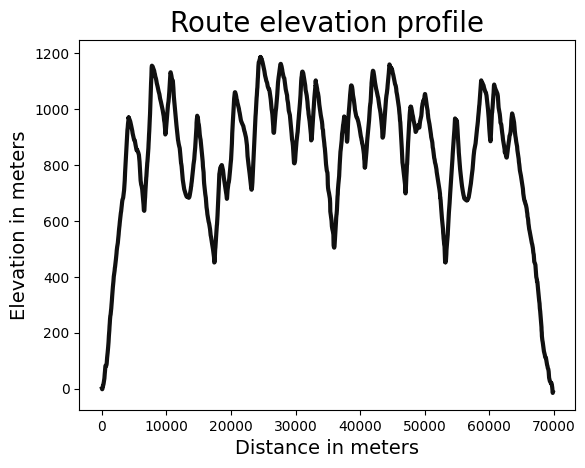

In [44]:
import matplotlib.pyplot as plt
cum_elev = np.cumsum(elev_diff)
#print(cum_elev)

plt.plot(df['distance'].fillna(0).cumsum(),cum_elev, color='#101010', lw=3)
plt.title('Route elevation profile', size=20)
plt.xlabel('Distance in meters', size=14)
plt.ylabel('Elevation in meters', size=14);

In [36]:
import pandas as pd
import numpy as np
points = []
for segment in gpx.tracks[0].segments:
    for p in segment.points:
        points.append({
            'time': parseTime(str(p.time)),
            'latitude': p.latitude,
            'longitude': p.longitude,
            'elevation': p.elevation,
        })
df = pd.DataFrame.from_records(points)

In [35]:
def parseTime(time):
    time = time.split(" ")[1].split("+")[0]
    #print(time)
    return time
parseTime("2023-01-01 07:34:19+00:00")
    

'07:34:19'

In [38]:
print(df.head)

<bound method NDFrame.head of           time  latitude  longitude   elevation     theta       phi  \
0     07:34:19   47.4504    12.3352  811.099976  0.215290  0.828166   
1     07:34:57   47.4501    12.3354  808.599976  0.215293  0.828160   
2     07:35:01   47.4499    12.3355  809.200012  0.215295  0.828157   
3     07:35:06   47.4497    12.3356  812.599976  0.215297  0.828153   
4     07:35:10   47.4495    12.3358  816.400024  0.215300  0.828150   
...        ...       ...        ...         ...       ...       ...   
2694  12:50:34   47.4502    12.3358  802.599976  0.215300  0.828162   
2695  12:50:38   47.4502    12.3359  798.099976  0.215302  0.828162   
2696  12:51:15   47.4503    12.3360  795.700012  0.215304  0.828164   
2697  12:51:23   47.4504    12.3361  795.400024  0.215306  0.828166   
2698  12:51:35   47.4505    12.3363  797.099976  0.215309  0.828167   

                 x             y             z            x2            y2  \
0     4.585115e+06  1.002668e+06  4.308

In [37]:
r = 6371000 # meters
df['theta'] = np.deg2rad(df['longitude'])
df['phi'] = np.deg2rad(df['latitude'])
df['x'] = r*np.cos(df['theta'])*np.sin(df['phi'])
df['y'] = r*np.sin(df['theta'])*np.sin(df['phi'])
df['z'] = r*np.cos(df['phi'])
df['x2'] = df['x'].shift()
df['y2'] = df['y'].shift()
df['z2'] = df['z'].shift()
df['distance'] = np.sqrt((df['x2']-df['x'])**2 + (df['y2']-df['y'])**2 + (df['z2']-df['z'])**2)
df['central angle'] = np.arccos((df['x']*df['x2'] + df['y']*df['y2'] + df['z']*df['z2'])/r**2)
df['arclength'] = df['central angle']*r

#TODO need time in iso format or anything else without date to calculate time diff
df['time_diff'] = -1 * pd.to_timedelta(df['time'].astype(str)).diff(-1).dt.total_seconds()
df['speed'] = df['arclength'] / df['time_diff']  # in meters/second

In [35]:
np.mean(df['speed']) * 3.6

21.701732639787387

In [38]:
np.max(df['speed'])*3.6

97.70728506365397

In [39]:
np.max(df['distance'])

108.56364591467538

In [68]:
max_distance = np.max(df['distance'])
dfb = df[df['distance']==max_distance].index.values
dfb = df[df['distance']==max_distance].index

print(dfb[0])
print(df.iloc[[dfb[0]-1]])
print(df.iloc[[dfb[0]]])
print(df.iloc[[dfb[0]+1]])
lat = df.iloc[[dfb[0]]]['latitude']
lon = df.iloc[[dfb[0]]]['longitude']
speed = df.iloc[[dfb[0]]]['speed']
time = df.iloc[[dfb[0]]]['time']

1120
          time  latitude  longitude    elevation     theta       phi  \
1119  09:08:49   47.3157    12.3642  1926.199951  0.215796  0.825815   

                 x             y             z            x2            y2  \
1119  4.574701e+06  1.002817e+06  4.319272e+06  4.574731e+06  1.002748e+06   

                z2   distance  central angle  arclength  time_diff      speed  
1119  4.319256e+06  76.853571       0.000012  76.853569        5.0  15.370714  
          time  latitude  longitude  elevation     theta       phi  \
1120  09:08:54   47.3159    12.3655     1922.0  0.215819  0.825818   

                 x             y             z            x2            y2  \
1120  4.574693e+06  1.002924e+06  4.319256e+06  4.574701e+06  1.002817e+06   

                z2    distance  central angle  arclength  time_diff      speed  
1120  4.319272e+06  108.563646       0.000017  108.56365        4.0  27.140913  
          time  latitude  longitude    elevation     theta      phi  \
11

In [48]:
        marker = folium.Marker(
            location=(gpx.tracks[0].segments[0].points[-2].latitude,gpx.tracks[0].segments[0].points[-2].longitude),
            icon=folium.Icon(icon='home'),
            tooltip=speed,
            popup=time,
        )
        marker.add_to(the_map)

In [69]:
        marker = folium.Marker(
            location=(lat,lon),
            icon=folium.Icon(icon='home'),
            tooltip=speed,
            popup=time,
        )
        marker.add_to(the_map)

In [70]:
the_map